Layer classification of Undergrad's thesis by Sanghun Jee

In [1]:
import numpy as np
import csv
import sys
import matplotlib.pyplot as plt
import pandas as pd
import tables
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from scipy import stats
import seaborn as sns; sns.set()

In [4]:
cd drive/undergrad thesis/mouse_VISp_gene_expression_matrices_2018-06-14

/content/drive/undergrad thesis/mouse_VISp_gene_expression_matrices_2018-06-14


In [0]:
#We will load the exon dataset and sample file
exon_filtered = pd.read_hdf('exon_filtered.h5', key='exon_filtered')
exon_filtered_log2 = np.log2(exon_filtered)
del exon_filtered
samples = pd.read_csv('mouse_VISp_2018-06-14_samples-columns.csv')
exon_filtered_log2[exon_filtered_log2==exon_filtered_log2.values[0, 0]]=0

In [0]:
#Layer indices
L1_ind = np.where(samples.values[:, 13] =='L1')[0]
L23_ind = np.where(samples.values[:, 13] =='L2/3')[0]
L4_ind = np.where(samples.values[:, 13] =='L4')[0]
L5_ind = np.where(samples.values[:, 13] =='L5')[0]
L6_ind = np.where(samples.values[:, 13] =='L6')[0]

In [0]:
#Layer data
L1_log2 = exon_filtered_log2.iloc[:, L1_ind]
L23_log2 = exon_filtered_log2.iloc[:, L23_ind]
L4_log2 = exon_filtered_log2.iloc[:, L4_ind]
L5_log2 = exon_filtered_log2.iloc[:, L5_ind]
L6_log2 = exon_filtered_log2.iloc[:, L6_ind]

clustering

In [0]:
#I already drew dendrogram and decided threshold
threshold = 300
clustering_L1 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L1_log2)
clustering_L23 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L23_log2)
clustering_L4 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L4_log2)
clustering_L5 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L5_log2)
clustering_L6 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L6_log2)

In [0]:
# now we know which genes are in which label
L1_labels = clustering_L1.labels_
L23_labels = clustering_L23.labels_
L4_labels = clustering_L4.labels_
L5_labels = clustering_L5.labels_
L6_labels = clustering_L6.labels_

In [0]:
pre_L1_labels = []
pre_L23_labels = []
pre_L4_labels = []
pre_L5_labels = []
pre_L6_labels = []
for i in range(0, 5295):
  pre_L1_labels.append((L1_labels[i], i))
  pre_L23_labels.append((L23_labels[i], i))
  pre_L4_labels.append((L4_labels[i], i))
  pre_L5_labels.append((L5_labels[i], i))
  pre_L6_labels.append((L6_labels[i], i))

In [0]:
pre_L1_labels = np.reshape(pre_L1_labels, (-1, 2))
pre_L23_labels = np.reshape(pre_L23_labels, (-1, 2))
pre_L4_labels = np.reshape(pre_L4_labels, (-1, 2))
pre_L5_labels = np.reshape(pre_L5_labels, (-1, 2))
pre_L6_labels = np.reshape(pre_L6_labels, (-1, 2))

In [0]:
total_pre = [pre_L1_labels, pre_L23_labels, pre_L4_labels, pre_L5_labels, pre_L6_labels]

In [0]:
#So we gotta make a list that ((layer_num), clustered_num, clustered_points)
gene_group = []
layer_num = []
for j in range(0, len(total_pre)):
  max = np.max(total_pre[j][:, 0]).astype(int)
  layer_num.append([j, max])
  for i in range(0, max):
    gene_group.append((i, np.where(total_pre[j][:, 0] == i)))
gene_group = np.reshape(gene_group, (-1, 2))
layer_num = np.reshape(layer_num, (-1, 2))

In [0]:
#Let's make a dictionary
#summmary[layer, cluster] = the gene index
summary = {}
gene_group_ind = 0
for i in layer_num[:, 0]:
  for j in range(0, layer_num[i, 1]):
    summary[i, j] = gene_group[gene_group_ind, 1][0]
    gene_group_ind += 1

In [0]:
#make mean value dataframe of each clustered geneset
L1, L23, L4, L5, L6 = {}, {}, {}, {}, {}

for i in range(0, layer_num[0, 1]):
  L1[i] = pd.DataFrame(np.mean(L1_log2.values[summary[0, i], :], axis=0))
for i in range(0, layer_num[1, 1]):
  L23[i] = pd.DataFrame(np.mean(L23_log2.values[summary[1, i], :], axis=0))
for i in range(0, layer_num[2, 1]):
  L4[i] = pd.DataFrame(np.mean(L4_log2.values[summary[2, i], :], axis=0))
for i in range(0, layer_num[3, 1]):
  L5[i] = pd.DataFrame(np.mean(L5_log2.values[summary[3, i], :], axis=0))
for i in range(0, layer_num[4, 1]):
  L6[i] = pd.DataFrame(np.mean(L6_log2.values[summary[4, i], :], axis=0))

L1_chi = pd.concat(L1, axis=1)
L23_chi = pd.concat(L23, axis=1)
L4_chi = pd.concat(L4, axis=1)
L5_chi = pd.concat(L5, axis=1)
L6_chi = pd.concat(L6, axis=1)

In [0]:
#Statistical test
_, p_L1 = stats.chisquare(L1_chi, ddof= layer_num[0, 1]-1)
_, p_L23 = stats.chisquare(L23_chi, ddof= layer_num[1, 1]-1)
_, p_L4 = stats.chisquare(L4_chi, ddof= layer_num[2, 1]-1)
_, p_L5 = stats.chisquare(L5_chi, ddof= layer_num[3, 1]-1)
_, p_L6 = stats.chisquare(L6_chi, ddof= layer_num[4, 1]-1)

In [0]:
#row = samples, col = genes sets.
signi_L1 = pd.DataFrame(L1_chi.values[:, np.logical_and(p_L1>0, p_L1<0.001)])
signi_L23 = pd.DataFrame(L23_chi.values[:, np.logical_and(p_L23>0, p_L23<0.001)])
signi_L4 = pd.DataFrame(L4_chi.values[:, np.logical_and(p_L4>0, p_L4<0.001)])
signi_L5 = pd.DataFrame(L5_chi.values[:, np.logical_and(p_L5>0, p_L5<0.001)])
signi_L6 = pd.DataFrame(L6_chi.values[:, np.logical_and(p_L6>0, p_L6<0.001)])

In [0]:
total_exon = [L1_log2, L23_log2, L4_log2, L5_log2, L6_log2]

In [0]:
import itertools
#Let's get which clustered things would be significantly represented the each layer
min_num = np.min([signi_L1.shape[0], signi_L23.shape[0], signi_L4.shape[0], signi_L5.shape[0], signi_L6.shape[0]])
L23_sample_num = np.random.choice(signi_L23.shape[0], size=min_num, replace=False)
L4_sample_num = np.random.choice(signi_L4.shape[0], size=min_num, replace=False)
L5_sample_num = np.random.choice(signi_L5.shape[0], size=min_num, replace=False)
L6_sample_num = np.random.choice(signi_L6.shape[0], size=min_num, replace=False)

p_value_overall = []
for i in itertools.product(*[np.arange(signi_L1.shape[1]), np.arange(signi_L23.shape[1]), np.arange(signi_L4.shape[1]), np.arange(signi_L5.shape[1]), np.arange(signi_L6.shape[1])]):
  candi = pd.DataFrame(np.vstack((signi_L1.values[:, i[0]], signi_L23.values[L23_sample_num, i[1]], signi_L4.values[L4_sample_num, i[2]], signi_L5.values[L5_sample_num, i[3]], signi_L6.values[L6_sample_num, i[4]]))).T
  _, p_candi = stats.chisquare(candi, ddof=4)
  if np.count_nonzero(p_candi<0.001) == 5:
    p_value_overall.append((i, p_candi))
    #print('p_value_num : {}, total: {}'.format(len(p_value_overall), i))
p_value_overall = np.reshape(p_value_overall, (-1, 2, 5))
#p_value_overall = np.reshape(p_value_overall, (-1, 2))
#np.savetxt('p_value_overal.txt', p_value_overall)

This is for control test which means there is no statistical test so that there is a lot of noise to learn whether cell is in certain layer

In [0]:

total_control_test = {}
num = 0

for i in range(0, len(p_L1)):
  total_control_test[num] = np.mean(exon_filtered_log2.iloc[summary[0, i], :], axis=0)
  num += 1
for i in range(0, len(p_L23)):
  total_control_test[num] = np.mean(exon_filtered_log2.iloc[summary[1, i], :], axis=0)
  num += 1
for i in range(0, len(p_L4)):
  total_control_test[num] = np.mean(exon_filtered_log2.iloc[summary[2, i], :], axis=0)
  num += 1
for i in range(0, len(p_L5)):
  total_control_test[num] = np.mean(exon_filtered_log2.iloc[summary[3, i], :], axis=0)
  num += 1
for i in range(0, len(p_L6)):
  total_control_test[num] = np.mean(exon_filtered_log2.iloc[summary[4, i], :], axis=0)
  num += 1

total_control_test = pd.DataFrame(total_control_test)
#num

286

This is for test. So the geneset is filtered by statistical test.

In [0]:
total_real_test = {}
num = 0

for i in np.nonzero(np.logical_and(p_L1>0, p_L1<0.005))[0]:
  total_real_test[num] = np.mean(exon_filtered_log2.iloc[summary[0, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L23>0, p_L23<0.005))[0]:
  total_real_test[num] = np.mean(exon_filtered_log2.iloc[summary[1, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L4>0, p_L4<0.005))[0]:
  total_real_test[num] = np.mean(exon_filtered_log2.iloc[summary[2, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L5>0, p_L5<0.005))[0]:
  total_real_test[num] = np.mean(exon_filtered_log2.iloc[summary[3, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L6>0, p_L6<0.005))[0]:
  total_real_test[num] = np.mean(exon_filtered_log2.iloc[summary[4, i], :], axis=0)
  num += 1

total_real_test = pd.DataFrame(total_real_test)
#num

34

In [0]:
labels = np.zeros((len(total_real_test)))
labels[L1_ind] = 1
labels[L23_ind] = 2
labels[L4_ind] = 3
labels[L5_ind] =4
labels[L6_ind] = 5
labels= pd.DataFrame(labels)

In [0]:
labels_real = pd.DataFrame(labels.values[np.where(labels>0)[0]].astype(int))

In [0]:
total_real_test = total_real_test.values[labels_real[0], :]

In [0]:
total_control_test = total_control_test.values[labels_real[0], :]

In [0]:
labels_real = pd.DataFrame(labels_real)

In [0]:
# I will split origianl set to training, test set
#for control or test set, I should change the code at the time.
from sklearn.model_selection import train_test_split
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(total_real_test, labels_real, test_size = .15, train_size = .85)
from keras.utils import to_categorical
y_train_binary_real = to_categorical(y_train_real)
y_test_binary_real = to_categorical(y_test_real)

In [0]:
import tensorflow as tf
import keras
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import regularizers
from keras import optimizers

In [0]:
model = Sequential()
model.add(Dense(X_train_real.shape[0], input_shape=(X_train_real.shape[1],), activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(Dense(X_train_real.shape[0], kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
model.add(layers.BatchNormalization())

# model.add(Dense(y_train_binary.shape[0]//4, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Dense(y_train_binary.shape[0]//8, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Dense(y_train_binary.shape[0]//16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(Dropout(0.3))
#model.add(Dense(y_train_binary.shape[0]//16, activation='relu'))

model.add(Dense(y_train_binary_real.shape[1], activation='softmax'))

Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer= Adam, metrics=['accuracy'])
model.summary()
h = model.fit(X_train_real, y_train_binary_real, epochs = 1000, batch_size = X_train_real.shape[0], verbose=1, validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 9306)              325710    
_________________________________________________________________
batch_normalization_7 (Batch (None, 9306)              37224     
_________________________________________________________________
dense_11 (Dense)             (None, 9306)              86610942  
_________________________________________________________________
batch_normalization_8 (Batch (None, 9306)              37224     
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 55842     
Total params: 87,066,942
Trainable params: 87,029,718
Non-trainable params: 37,224
_________________________________________________________________
Train on 8375 samples, validate on 931 samples
Epoch 1/1000
8375/8375 [==============================] - 8s 988us/step - loss

In [0]:
# Does this model predict well?
pred = model.predict(X_test_real, batch_size=X_test_real.shape[0], verbose=1, steps=None)
np.where(pred[0] == np.max(pred[0]))
predict = []
max_label = np.max(pred, axis=1)
for i in range(0, len(max_label)):
  predict.append(np.where(pred[i] == max_label[i]))
predict = np.reshape(predict, (1, -1))[0]
from sklearn.metrics import accuracy_score
accuracy_score(predict, y_test_real)

1643/1643 [==============================] - 0s 207us/step


1.0

In [0]:
#Save the test set model and results
from keras.utils import plot_model
plot_model(model, to_file='model_test.png', show_shapes=True, show_layer_names=True)

history = h
# Plot training & validation accuracy values
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')
fig.savefig('Layer_classification accuracy_test.png')

# Plot training & validation loss values
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')
fig1.savefig('Layer_classification loss_test.png')

In [ ]:
#Save the control set model and results
from keras.utils import plot_model
plot_model(model, to_file='model_control.png', show_shapes=True, show_layer_names=True)

history = h
# Plot training & validation accuracy values
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')
fig.savefig('Layer_classification accuracy_control.png')

# Plot training & validation loss values
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')
fig1.savefig('Layer_classification loss_control.png')

Below cells are for testing interlayer_cell like L1_L23. Not completed yet...

In [0]:
L1_L23_ind = np.where(samples.iloc[:, 13] == 'L1-L2/3')[0]
L6b_ind = np.where(samples.iloc[:, 13] == 'L6b')[0]
L1_L4_ind = np.where(samples.iloc[:, 13] == 'L1-L4')[0]
L4_L5_ind = np.where(samples.iloc[:, 13] == 'L4-L5')[0]
L5_L6_ind = np.where(samples.iloc[:, 13] == 'L5-L6')[0]

In [0]:
L1_L23 = pd.DataFrame(exon_filtered_log2.values[:, L1_L23_ind])
L1_L4 = pd.DataFrame(exon_filtered_log2.values[:, L1_L4_ind])
L4_L5 = pd.DataFrame(exon_filtered_log2.values[:, L4_L5_ind])
L5_L6 = pd.DataFrame(exon_filtered_log2.values[:, L5_L6_ind])

In [0]:
L6b = pd.DataFrame(exon_filtered_log2.values[:, L6b_ind])

In [0]:
L5_L6_test = {}
num = 0

for i in np.nonzero(np.logical_and(p_L1>0, p_L1<0.005))[0]:
  L5_L6_test[num] = np.mean(L5_L6.iloc[summary[0, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L23>0, p_L23<0.005))[0]:
  L5_L6_test[num] = np.mean(L5_L6.iloc[summary[1, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L4>0, p_L4<0.005))[0]:
  L5_L6_test[num] = np.mean(L5_L6.iloc[summary[2, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L5>0, p_L5<0.005))[0]:
  L5_L6_test[num] = np.mean(L5_L6.iloc[summary[3, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L6>0, p_L6<0.005))[0]:
  L5_L6_test[num] = np.mean(L5_L6.iloc[summary[4, i], :], axis=0)
  num += 1

L5_L6_test = pd.DataFrame(L5_L6_test)
num

34

In [0]:
L6b_test = {}
num = 0

for i in np.nonzero(np.logical_and(p_L1>0, p_L1<0.005))[0]:
  L6b_test[num] = np.mean(L6b.iloc[summary[0, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L23>0, p_L23<0.005))[0]:
  L6b_test[num] = np.mean(L6b.iloc[summary[1, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L4>0, p_L4<0.005))[0]:
  L6b_test[num] = np.mean(L6b.iloc[summary[2, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L5>0, p_L5<0.005))[0]:
  L6b_test[num] = np.mean(L6b.iloc[summary[3, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L6>0, p_L6<0.005))[0]:
  L6b_test[num] = np.mean(L6b.iloc[summary[4, i], :], axis=0)
  num += 1

L6b_test = pd.DataFrame(L6b_test)
num

34

In [0]:
L4_L5_test = {}
num = 0

for i in np.nonzero(np.logical_and(p_L1>0, p_L1<0.005))[0]:
  L4_L5_test[num] = np.mean(L4_L5.iloc[summary[0, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L23>0, p_L23<0.005))[0]:
  L4_L5_test[num] = np.mean(L4_L5.iloc[summary[1, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L4>0, p_L4<0.005))[0]:
  L4_L5_test[num] = np.mean(L4_L5.iloc[summary[2, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L5>0, p_L5<0.005))[0]:
  L4_L5_test[num] = np.mean(L4_L5.iloc[summary[3, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L6>0, p_L6<0.005))[0]:
  L4_L5_test[num] = np.mean(L4_L5.iloc[summary[4, i], :], axis=0)
  num += 1

L4_L5_test = pd.DataFrame(L4_L5_test)
num

34

In [0]:
L1_L4_test = {}
num = 0

for i in np.nonzero(np.logical_and(p_L1>0, p_L1<0.005))[0]:
  L1_L4_test[num] = np.mean(L1_L4.iloc[summary[0, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L23>0, p_L23<0.005))[0]:
  L1_L4_test[num] = np.mean(L1_L4.iloc[summary[1, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L4>0, p_L4<0.005))[0]:
  L1_L4_test[num] = np.mean(L1_L4.iloc[summary[2, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L5>0, p_L5<0.005))[0]:
  L1_L4_test[num] = np.mean(L1_L4.iloc[summary[3, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L6>0, p_L6<0.005))[0]:
  L1_L4_test[num] = np.mean(L1_L4.iloc[summary[4, i], :], axis=0)
  num += 1

L1_L4_test = pd.DataFrame(L1_L4_test)
num

34

In [0]:
L1_L23_test = {}
num = 0

for i in np.nonzero(np.logical_and(p_L1>0, p_L1<0.005))[0]:
  L1_L23_test[num] = np.mean(L1_L23.iloc[summary[0, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L23>0, p_L23<0.005))[0]:
  L1_L23_test[num] = np.mean(L1_L23.iloc[summary[1, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L4>0, p_L4<0.005))[0]:
  L1_L23_test[num] = np.mean(L1_L23.iloc[summary[2, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L5>0, p_L5<0.005))[0]:
  L1_L23_test[num] = np.mean(L1_L23.iloc[summary[3, i], :], axis=0)
  num += 1
for i in np.nonzero(np.logical_and(p_L6>0, p_L6<0.005))[0]:
  L1_L23_test[num] = np.mean(L1_L23.iloc[summary[4, i], :], axis=0)
  num += 1

L1_L23_test = pd.DataFrame(L1_L23_test)
num

34

In [0]:
#L1_L23 prediction test
X = L5_L6_test
pred = model.predict(X, batch_size=X.shape[0], verbose=1, steps=None)
np.where(pred[0] == np.max(pred[0]))
predict = []
max_label = np.max(pred, axis=1)
for i in range(0, len(max_label)):
  predict.append(np.where(pred[i] == max_label[i]))
predict = np.reshape(predict, (1, -1))[0]
#pred = np.reshape(pred, (-1, 5))
#from sklearn.metrics import accuracy_score
#accuracy_score(predict)

1007/1007 [==============================] - 0s 76us/step


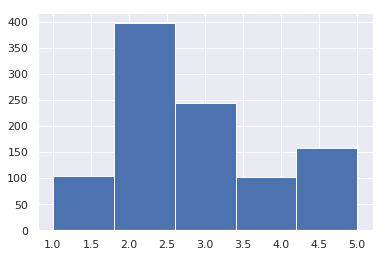

In [0]:
_=plt.hist(predict, 5)

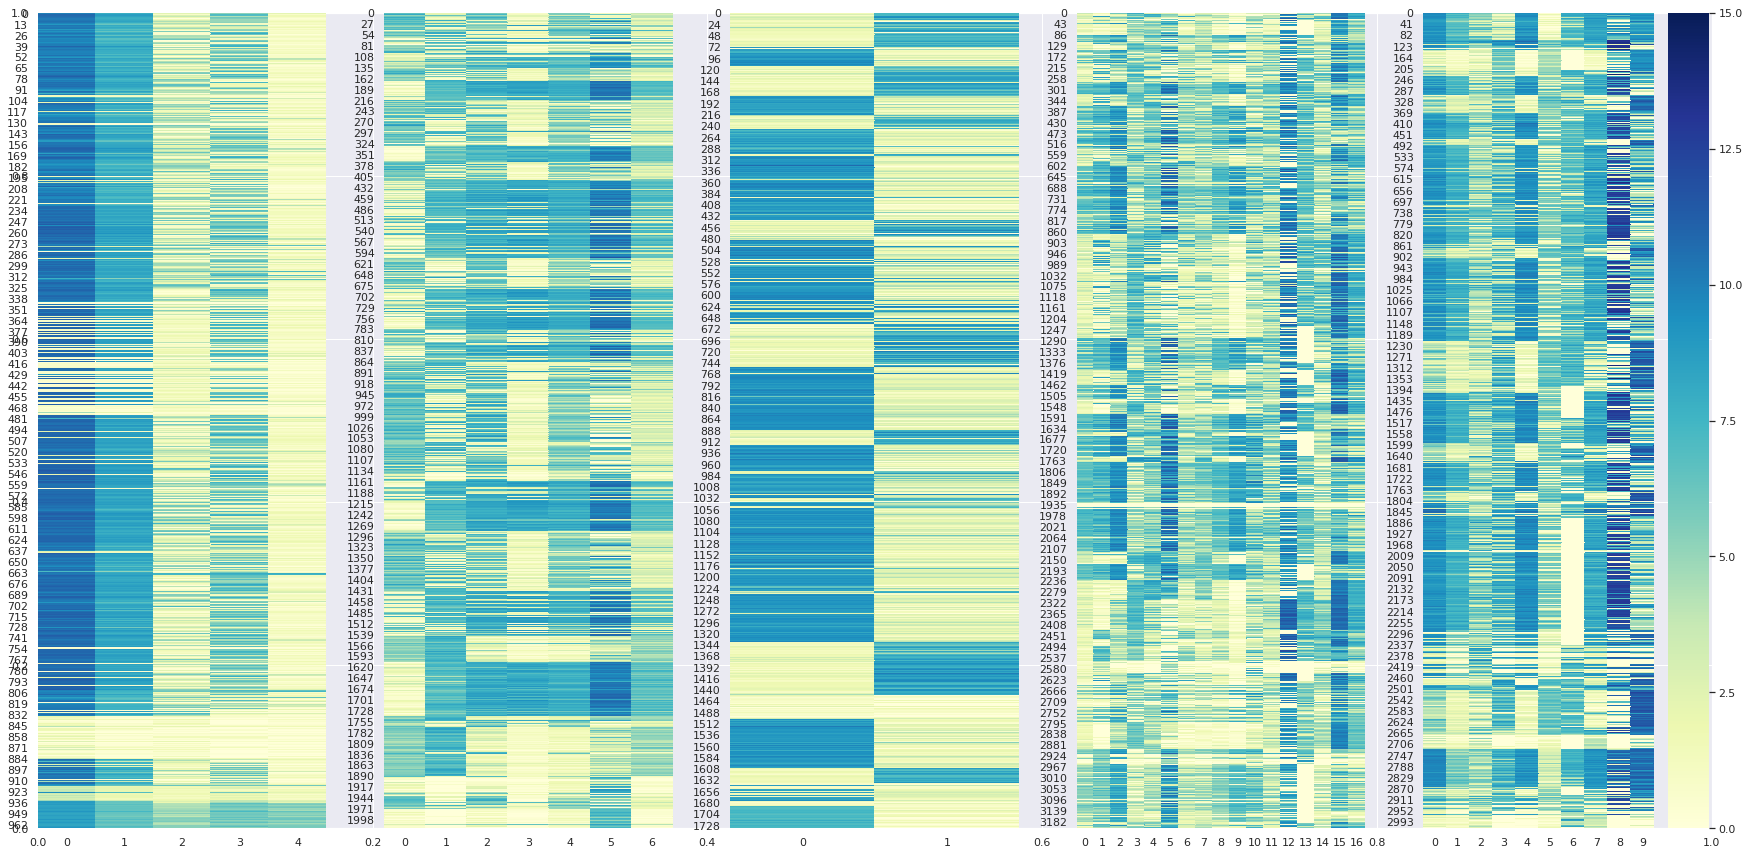

In [0]:
#Each significant geneset heatmap
fig, _= plt.subplots(figsize=(30, 15))
ax1 = fig.add_subplot(1, 5, 1)
ax1 = sns.heatmap(signi_L1, vmin = 0, vmax = 15, cbar = False, cmap="YlGnBu")

ax2 = fig.add_subplot(1, 5, 2)
ax2 = sns.heatmap(signi_L23, vmin = 0, vmax = 15, cbar = False, cmap="YlGnBu")


ax3 = fig.add_subplot(1, 5, 3)
ax3 = sns.heatmap(signi_L4, vmin = 0, vmax = 15, cbar = False, cmap="YlGnBu")

ax4 = fig.add_subplot(1, 5, 4)
ax4 = sns.heatmap(signi_L5, vmin = 0, vmax = 15, cbar = False, cmap="YlGnBu")

ax5 = fig.add_subplot(1, 5, 5)
ax5 = sns.heatmap(signi_L6, vmin = 0, vmax = 15, cmap="YlGnBu")

plt.show()

In [ ]:
#@title
# import numpy as np
# import csv
# import sys
# import matplotlib.pyplot as plt
# import pandas as pd
# import tables
# from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, ward
# from sklearn.decomposition import PCA
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.manifold import TSNE
# from scipy import stats
# import itertools
# import seaborn as sns; sns.set()

#cd drive/undergrad thesis/mouse_VISp_gene_expression_matrices_2018-06-14
exon_filtered = pd.read_hdf('exon_filtered.h5', key='exon_filtered')
exon_filtered_log2 = np.log2(exon_filtered)
del exon_filtered
samples = pd.read_csv('mouse_VISp_2018-06-14_samples-columns.csv')
exon_filtered_log2[exon_filtered_log2==exon_filtered_log2.values[0, 0]]=0
L1_ind = np.where(samples.values[:, 13] =='L1')[0]
L23_ind = np.where(samples.values[:, 13] =='L2/3')[0]
L4_ind = np.where(samples.values[:, 13] =='L4')[0]
L5_ind = np.where(samples.values[:, 13] =='L5')[0]
L6_ind = np.where(samples.values[:, 13] =='L6')[0]
L1_log2 = exon_filtered_log2.iloc[:, L1_ind]
L23_log2 = exon_filtered_log2.iloc[:, L23_ind]
L4_log2 = exon_filtered_log2.iloc[:, L4_ind]
L5_log2 = exon_filtered_log2.iloc[:, L5_ind]
L6_log2 = exon_filtered_log2.iloc[:, L6_ind]

#Clustering
threshold = 300
clustering_L1 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L1_log2)
clustering_L23 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L23_log2)
clustering_L4 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L4_log2)
clustering_L5 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L5_log2)
clustering_L6 = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= threshold).fit(L6_log2)

L1_labels = clustering_L1.labels_
L23_labels = clustering_L23.labels_
L4_labels = clustering_L4.labels_
L5_labels = clustering_L5.labels_
L6_labels = clustering_L6.labels_

pre_L1_labels = []
pre_L23_labels = []
pre_L4_labels = []
pre_L5_labels = []
pre_L6_labels = []
for i in range(0, 5295):
  pre_L1_labels.append((L1_labels[i], i))
  pre_L23_labels.append((L23_labels[i], i))
  pre_L4_labels.append((L4_labels[i], i))
  pre_L5_labels.append((L5_labels[i], i))
  pre_L6_labels.append((L6_labels[i], i))

pre_L1_labels = np.reshape(pre_L1_labels, (-1, 2))
pre_L23_labels = np.reshape(pre_L23_labels, (-1, 2))
pre_L4_labels = np.reshape(pre_L4_labels, (-1, 2))
pre_L5_labels = np.reshape(pre_L5_labels, (-1, 2))
pre_L6_labels = np.reshape(pre_L6_labels, (-1, 2))

total_pre = [pre_L1_labels, pre_L23_labels, pre_L4_labels, pre_L5_labels, pre_L6_labels]
#So we gotta make a list that ((layer_num), clustered_num, clustered_points)
gene_group = []
layer_num = []
for j in range(0, len(total_pre)):
  max = np.max(total_pre[j][:, 0]).astype(int)
  layer_num.append([j, max])
  for i in range(0, max):
    gene_group.append((i, np.where(total_pre[j][:, 0] == i)))
gene_group = np.reshape(gene_group, (-1, 2))
layer_num = np.reshape(layer_num, (-1, 2))

#Let's make a dictionary
#summmary[layer, cluster] = the gene index
summary = {}
gene_group_ind = 0
for i in layer_num[:, 0]:
  for j in range(0, layer_num[i, 1]):
    summary[i, j] = gene_group[gene_group_ind, 1][0]
    gene_group_ind += 1
    
L1, L23, L4, L5, L6 = {}, {}, {}, {}, {}

for i in range(0, layer_num[0, 1]):
  L1[i] = pd.DataFrame(np.mean(L1_log2.values[summary[0, i], :], axis=0))
for i in range(0, layer_num[1, 1]):
  L23[i] = pd.DataFrame(np.mean(L23_log2.values[summary[1, i], :], axis=0))
for i in range(0, layer_num[2, 1]):
  L4[i] = pd.DataFrame(np.mean(L4_log2.values[summary[2, i], :], axis=0))
for i in range(0, layer_num[3, 1]):
  L5[i] = pd.DataFrame(np.mean(L5_log2.values[summary[3, i], :], axis=0))
for i in range(0, layer_num[4, 1]):
  L6[i] = pd.DataFrame(np.mean(L6_log2.values[summary[4, i], :], axis=0))
  
L1_chi = pd.concat(L1, axis=1)
L23_chi = pd.concat(L23, axis=1)
L4_chi = pd.concat(L4, axis=1)
L5_chi = pd.concat(L5, axis=1)
L6_chi = pd.concat(L6, axis=1)

_, p_L1 = stats.chisquare(L1_chi, ddof= layer_num[0, 1]-1)
_, p_L23 = stats.chisquare(L23_chi, ddof= layer_num[1, 1]-1)
_, p_L4 = stats.chisquare(L4_chi, ddof= layer_num[2, 1]-1)
_, p_L5 = stats.chisquare(L5_chi, ddof= layer_num[3, 1]-1)
_, p_L6 = stats.chisquare(L6_chi, ddof= layer_num[4, 1]-1)

#row = samples, col = genes sets.
signi_L1 = pd.DataFrame(L1_chi.values[:, p_L1<0.001])
signi_L23 = pd.DataFrame(L23_chi.values[:, p_L23<0.001])
signi_L4 = pd.DataFrame(L4_chi.values[:, p_L4<0.001])
signi_L5 = pd.DataFrame(L5_chi.values[:, p_L5<0.001])
signi_L6 = pd.DataFrame(L6_chi.values[:, p_L6<0.001])


#Let's figure out which clustered things would significantly represent the each layer
min_num = np.min([signi_L1.shape[0], signi_L23.shape[0], signi_L4.shape[0], signi_L5.shape[0], signi_L6.shape[0]])
L1_sample_num = np.random.choice(signi_L1.shape[0], size=min_num, replace=False)
L23_sample_num = np.random.choice(signi_L23.shape[0], size=min_num, replace=False)
L4_sample_num = np.random.choice(signi_L4.shape[0], size=min_num, replace=False)
L5_sample_num = np.random.choice(signi_L5.shape[0], size=min_num, replace=False)
L6_sample_num = np.random.choice(signi_L6.shape[0], size=min_num, replace=False)

p_value_overall = []
for i in itertools.product(*[np.arange(signi_L1.shape[1]), np.arange(signi_L23.shape[1]), np.arange(signi_L4.shape[1]), np.arange(signi_L5.shape[1]), np.arange(signi_L6.shape[1])]):
  candi = pd.DataFrame(np.vstack((signi_L1.values[:, i[0]], signi_L23.values[L23_sample_num, i[1]], signi_L4.values[L4_sample_num, i[2]], signi_L5.values[L5_sample_num, i[3]], signi_L6.values[L6_sample_num, i[4]]))).T
  _, p_candi = stats.chisquare(candi, ddof=4)
  if np.count_nonzero(p_candi<0.001) == 5:
    p_value_overall.append((i, p_candi))
    #print('p_value_num : {}, total: {}'.format(len(p_value_overall), i))
p_value_overall = np.reshape(p_value_overall, (-1, 2, 5))
#p_value_overall = np.reshape(p_value_overall, (-1, 2))
#np.savetxt('p_value_overal.txt', p_value_overall)

#Let's get the significant(p<0.001) geneset for each layer
p_L1_clust = np.unique(p_value_overall[:, 0, 0])
p_L23_clust = np.unique(p_value_overall[:, 0, 1])
p_L4_clust = np.unique(p_value_overall[:, 0, 2])
p_L5_clust = np.unique(p_value_overall[:, 0, 3])
p_L6_clust = np.unique(p_value_overall[:, 0, 4])
p_total_clust = [p_L1_clust, p_L23_clust, p_L4_clust, p_L5_clust, p_L6_clust]